# Fitting data to models

Parametric fitting involves finding coefficients (parameters) for one or more
models that you want to fit to some experimental data.

In general we assume data to be statistical in nature, this means that we can
assume it to be divided into two components:
```{math}
\text{``data''}\;=\;\text{``true value''}\;+\;\text{``statistical error''},
```
the other fundamental part is that we are assuming the deterministic component
to be given by a model for which the random component is described as an error
associated with the data:
```{math}
\text{``data''}\;=\;\text{``model''}\;+\;\text{``error''}.
```
The model is a function of the independent data (predictor) and one or more
coefficients, that are the quantities we want to compute. The error represents
random variations in the data. For doing a mathematical analysis one usually
assumes that they follow a specific probability distribution - in most of the
case Gaussian. The source of the error can be varied, but it is always present,
errors are bound to happen when you are dealing with measured data.

## Least square approach

To write down formally the idea we have discussed we can express a general
**nonlinear regression model** as
```{math}
Y_n = f(x_n, \theta) + Z_n,
```
where $f$ is the model we want to *fit*, $x_n$ is a vector of the associated
variable, $Y_n$ are the attained measurements, $\theta$ is a vector of
parameters defining the model, and $Z_n$ is the error term.

To be more practical and less formal, let us start with the tale of a certain
Count Rumford of Bavaria (see {cite}`MR1060528`). He was one of the early experimenters on the physics
of heat. In 1798 he performed the following experiment, he heated a cannon barrel
to a temperature of $130^\circ\,{\rm F}$ and then let it cool to the room
temperature of $60^\circ\,{\rm F}$ while taking measure of temperature at
different time intervals:
```{code} matlab
data = [ 4 126 % Time (min) and Temperature (°F)
  5 125
  7 123
  12 120
  14 119
  16 118
  20 116
  24 115
  28 114
  31 113
  34 112
  37.5 111
  41 110
]
```
To interpret these data we can use Newton's law of cooling, which states that
```{math}
\frac{\partial f}{\partial t} = - \theta(f-T_0),
```
where $T_0$ is the ambient temperature. This is one of the few differential
equations we actually know how to solve, and indeed we can express
```{math}
f(t,\theta) = T_0 + (T_f - T_0) e^{-\theta t} = 60 + 70 e^{-\theta t}.
```
This model now depends *nonlinearly* on just one parameter $\theta$ that is
the one that we have to fit to our data. Mathematically this means that we
want to find $\theta$ such that
```{math}
  \min \sum_{j=1}^{\text{# of data}}|f(t_j,\theta) - T_j|^2,
```
that is we want to solve a **least square** problem. Typically, together with
the previous *objective function* we have also some *constraints* on the
parameters. For example in this case we may want to impose the constraint of
having $\theta > 0$.

To solve these type of problems MATLAB offers a function called `fit`. Let us
look at its usage:
```{code} matlab
fo = fitoptions('Method','NonlinearLeastSquares',...
               'Lower',[0],...
               'Upper',[Inf],...
               'StartPoint',[1]);
ft = fittype('60 + 70*exp(-a*x)','options',fo);
[curve,gof] = fit(data(:,1),data(:,2),ft);
```
1. First we have set up some options for the `fit` function:
- in the `'Method'` field we have selected the `'NonlinearLeastSquares'`
  options. This tells MATLAB that we want to solve the problem in the
  mathematical formulation given above.
- The `'Lower'` and `'Upper'` keywords denote the bound on the parameters in
  the order in which they appear in the model. In our case we have just one
  parameter $\theta$ so we request that `0 \leq \theta \leq \infty`, that is
  $\theta \geq 0$.
- Finally, with the keyword `'StartPoint'` we tell the algorithm what is the
  starting point of the *iterative procedure* producing the solution. **Having
  good starting points for the parameters could be crucial!**.
2. Then we fix the model we want to fit, the variable is always denote as `x`
while the other letters appearing in the expression are interpreted as
the parameters
3. We finally launch the *fit* operation with the command of the same name by
passing to it the data and the model we have defined.

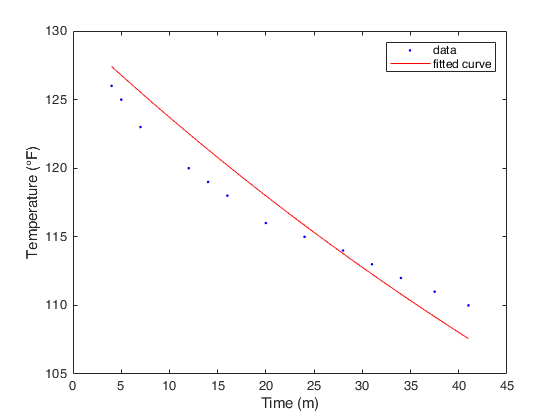

In [1]:
data = [ 4 126 % Time (min) and Temperature (°F)
  5 125
  7 123
  12 120
  14 119
  16 118
  20 116
  24 115
  28 114
  31 113
  34 112
  37.5 111
  41 110
];
fo = fitoptions('Method','NonlinearLeastSquares',...
               'Lower',[0],...
               'Upper',[Inf],...
               'StartPoint',[1]);
ft = fittype('60 + 70*exp(-a*x)','options',fo);
[curve,gof] = fit(data(:,1),data(:,2),ft);
% We plot the results
figure(1)
plot(curve,data(:,1),data(:,2))
xlabel('Time (m)');
ylabel('Temperature (°F)');

The other information we can extract from the fit are contained in the two
outputs of the `fit` function, namely:

In [2]:
disp(curve)
disp(gof)

     General model:
     curve(x) = 60 + 70*exp(-a*x)


     Coefficients (with 95% confidence bounds):
       a =    0.009416  (0.0085, 0.01033)


           sse: 44.1558
       rsquare: 0.8682
           dfe: 12
    adjrsquare: 0.8682
          rmse: 1.9182



## Bibliography

```{bibliography}
:filter: docname in docnames
```